# Stair-case study analyzer

__input__ = arrays of study data 

__output__=  PSEs and analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import wilcoxon

%matplotlib inline

In [3]:
data = [ # DUMMY DATA, some condition with N participants.
    [8,7,6,5,4,3,2,3,4,5,4,3,2,1,2,3,2,1,2,3],
    [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
    [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
    [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
    [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
    [8,7,6,5,4,3,2,3,4,5,4,3,2,1,2,3,2,1,2,3],
    [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
    [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
    [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
    [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
]

data_2 = [ # DUMMY DATA, some condition with N participants.
    [5,4,3,4,3,2,1,2,3,4,3,2,3],
    [7,6,5,4,3,4,5,4,3,4,5,4,3,4,3,4],
    [8,7,6,5,4,3,2,3,4,5,4,3,2,1,0,1,2,1,2,3],
    [9,8,7,6,5,4,3,4,5,4,3,2,3,4,5,6,5,4,3,2,3,4],
    [1,2,3,4,5,4,3,2,3,4,3,2,1,2,3,4,3,4,3,2,3,4],
    [5,4,3,4,3,2,1,2,3,4,3,2,3],
    [7,6,5,4,3,4,5,4,3,4,5,4,3,4,3,4],
    [8,7,6,5,4,3,2,3,4,5,4,3,2,1,0,1,2,1,2,3],
    [9,8,7,6,5,4,3,4,5,4,3,2,3,4,5,6,5,4,3,2,3,4],
    [1,2,3,4,5,4,3,2,3,4,3,2,1,2,3,4,3,4,3,2,3,4],
]

## Utilities

In [4]:
def getLastNReversals(arr, n=3):
    prev_a = 0
    down = False
    ret = []
    for idx, a in enumerate(arr):
        if idx==0:
            prev_a = a
            continue
        elif idx==1:
            if prev_a > a: down = True
            else:          down = False
            prev_a = a
            continue
        else:
            if (down == True) and (prev_a < a):
                down = False
                ret.append(prev_a)
            elif (down == False) and (prev_a > a):
                down = True
                ret.append(prev_a)
        if len(ret) >= n:
            return ret
        prev_a = a
    return ret

In [12]:
def getPSEs(data, n=3):
    ret = []
    for d in data:
        revs = getLastNReversals(d, n)
#         print(revs)
        if len(revs) != 0:
            ret.append(sum(revs) / len(revs))
    return ret
def getPSE(data, n=3):
    revs = getLastNReversals(data,n)
    ret = 0
    if len(revs) != 0:
         ret = (sum(revs) / len(revs))
    return ret

In [34]:
def plotStaircase(arr, title = "arm-space P1"):
    plt.title(title + ", PSE = " + str(getPSE(arr, n=5)))
    x = range(1, len(arr)+1)
    y = arr
    g = sns.lineplot(x=x,y=y,marker='o')
    g.axhline(getPSE(arr,n=5), color = 'red', label="PSE")
    plt.legend()

## stat-test

### Wilcoxon test (non-parametric test)

In [7]:
title = wilcoxon(getPSEs(data,5), getPSEs(data_2,5))

<AxesSubplot:title={'center':'WilcoxonResult(statistic=3.0, pvalue=0.009765625)'}, xlabel='conds', ylabel='PSE of subjective spaciousness'>

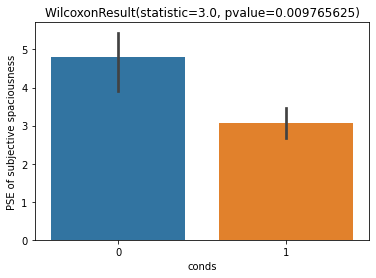

In [32]:
def plotTestResult(data, n=5):
    title = wilcoxon(getPSEs(data,n), getPSEs(data_2,n))
    plt.title(title)
    plt.xlabel('conds')
    plt.ylabel('PSE of subjective spaciousness')
    sns.barplot(data=[getPSEs(data,n), getPSEs(data_2,n)])

<AxesSubplot:title={'center':'WilcoxonResult(statistic=3.0, pvalue=0.009765625)'}>

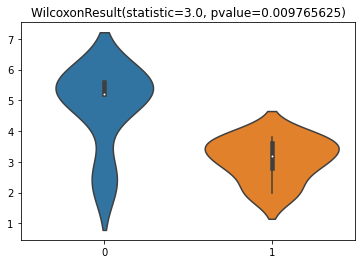

In [9]:
plt.title(title)
sns.violinplot(data=[getPSEs(data,5), getPSEs(data_2,5)])

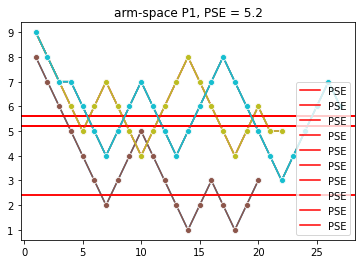

In [45]:
for i in range(0, len(data)):
    plotStaircase(data[i])